===== 2D DATA =====


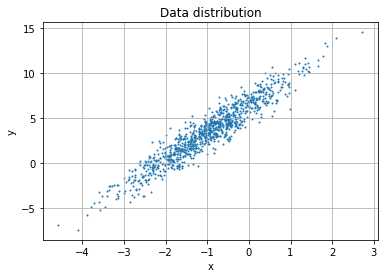

Covariance matrix
[[ 1.0488663   3.14059323]
 [ 3.14059323 10.43188249]]
Correlation coefficient=  0.9494460267240379
Correlation coefficient very close to 1 -> x and y are correlated
Eigenvalues: [ 0.09470579 11.386043  ]
Matrix with eigenvectors as columns:
[[-0.95681567  0.29069531]
 [ 0.29069531  0.95681567]]


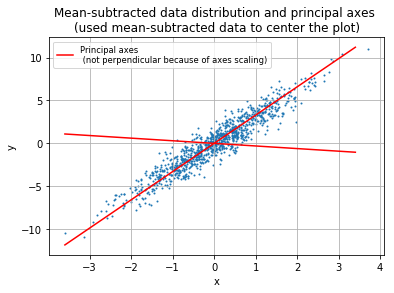

Rotating data to obtain their 
distribution along principal axes
New data:
            X          Y
0    2.074563   7.988727
1    1.758135   3.650034
2    1.740199   5.884536
3    2.336651   9.209602
4    1.669686  -2.854511
5    2.104634  -2.547787
6    2.306216   5.057327
7    2.323707   8.439393
8    2.568983   3.584240
9    2.437381   2.334830
10   2.046684   4.696463
11   2.327247  -3.230584
12   1.683407   3.299194
13   2.685856   3.062671
14   1.912770   3.075676
15   2.345969   7.354269
16   1.763486   1.733909
17   0.984880   5.174292
18   1.585847   4.125334
19   1.534829   0.908182
20   2.269354   4.664268
21   1.623717  14.731608
22   1.724402  -0.012156
23   2.359699  -0.135444
24   1.747377   3.465346
25   2.072712  -2.780484
26   1.883699   3.703931
27   2.399849   5.425590
28   2.378466   9.567804
29   1.909095   4.428785
..        ...        ...
970  2.201778   1.124427
971  2.569749   3.376498
972  1.551882  -4.041669
973  1.889641   5.966022
974  2.025323  -0.857123


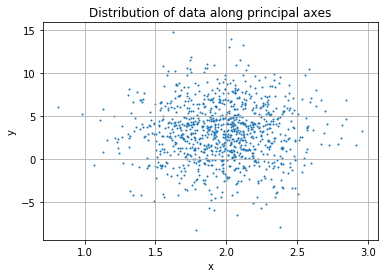

==== 5D DATA ====


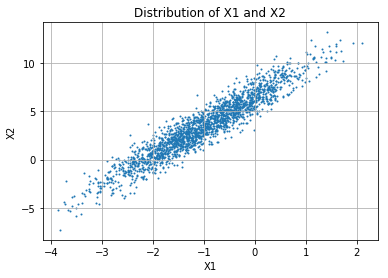

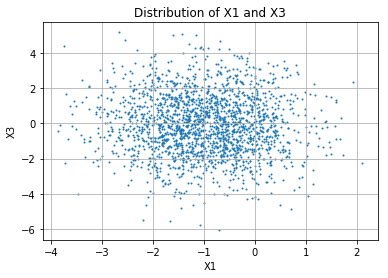

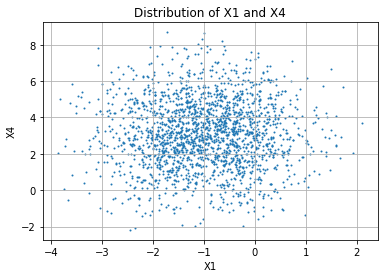

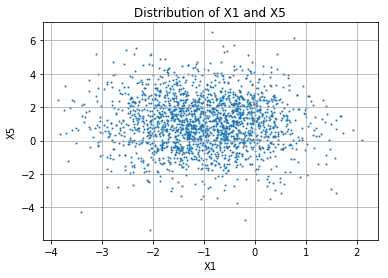

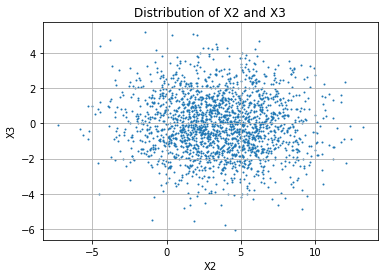

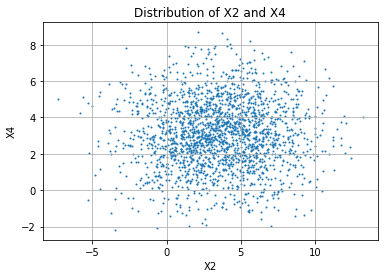

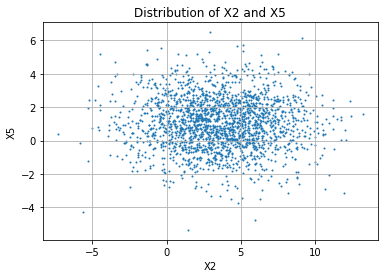

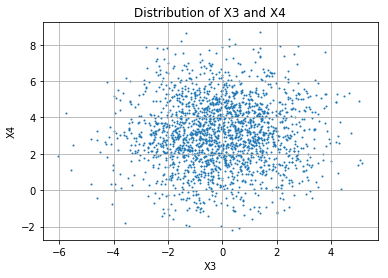

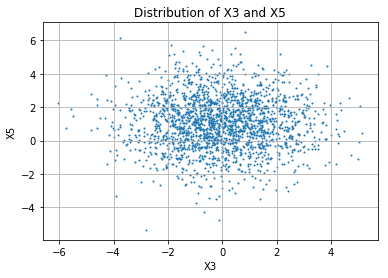

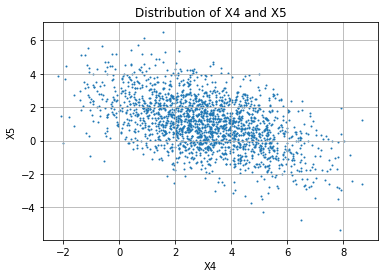

Covariance matrix
[[ 0.95237517  2.87950804 -0.06653584  0.01807121 -0.04845528]
 [ 2.87950804  9.70270498 -0.24349474  0.0872467  -0.12357462]
 [-0.06653584 -0.24349474  2.89509342  0.07193771 -0.02947856]
 [ 0.01807121  0.0872467   0.07193771  3.45439789 -1.42267572]
 [-0.04845528 -0.12357462 -0.02947856 -1.42267572  2.4411335 ]]
Normalized covariance matrix
[[ 1.          0.94725706 -0.04007009  0.00996316 -0.03177908]
 [ 0.94725706  1.         -0.04594221  0.01507011 -0.02539143]
 [-0.04007009 -0.04594221  1.          0.02274779 -0.01108866]
 [ 0.00996316  0.01507011  0.02274779  1.         -0.48991865]
 [-0.03177908 -0.02539143 -0.01108866 -0.48991865  1.        ]]

Correlation coefficient between X1 and X2 :0.9472570586611333
X1 and X2 are correlated

Correlation coefficient between X1 and X3 :-0.04007009145704369
X1 and X3 are not correlated

Correlation coefficient between X1 and X4 :0.00996315871609167
X1 and X4 are not correlated

Correlation coefficient between X1 and X5 :-0

In [2]:
# homework # 01

## Here we are going to get a little experience with the covariance matrix 
## of data and principle components analysis.  This was introduced in the 
## lectures.

# 1) Read file homework_01_2d-datafile.csv into a dataframe using pandas

    # plot them as points
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
print('===== 2D DATA =====')
file='homework_01_2d-datafile.csv'
data=pd.read_csv(file,header=0,index_col=0)
data_array=data.values
x=data_array[:,0]
y=data_array[:,1]
plt.scatter(x,y,s=1)
plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
# 2) Find the covariance matrix for the two variables.  There is a python function for this, 
#    but it would be more instructive if you write your own.
      
    # Are they correlated? (Remember to normalize the correlation coefficient.)
xmed=np.mean(x)
ymed=np.mean(y)
xs=x-xmed
ys=y-ymed
matrix=np.matrix.transpose(np.array([xs,ys]))
cov=np.zeros((2,2))
for i in range(2):
    for j in range(2):
        s=0
        for k in range(len(x)):
             s=s+matrix[k][i]*matrix[k][j]
             cov[i][j]=1/len(x)*s
print('Covariance matrix')
print(cov)
c=cov[0][1]
sigmax=math.sqrt(np.var(x))
sigmay=math.sqrt(np.var(y))
ro=c/(sigmax*sigmay)
print('Correlation coefficient= ',ro)
print('Correlation coefficient very close to 1 -> x and y are correlated')
# 3) Decompose the covariance matrix using an eigenvalue decompositions (There are python functions for this.)

    # What are the principle components of the data?
    
    # What are the variances of each principle component?
eigval,eigvec=np.linalg.eigh(cov)
print('Eigenvalues:',eigval)
print('Matrix with eigenvectors as columns:')
print(eigvec)

x1=np.arange(min(xs),max(xs),0.5)
y1=x1*eigvec[1,0]/eigvec[0,0]
y2=x1*eigvec[1,1]/eigvec[0,1]
plt.plot(x1,y1,color='red')
plt.plot(x1,y2,color='red',label='Principal axes \n (not perpendicular because of axes scaling)')
plt.title('Mean-subtracted data distribution and principal axes \n(used mean-subtracted data to center the plot)')
plt.scatter(xs,ys,s=1) 
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper left',fontsize='small')
plt.show()

print('Rotating data to obtain their \ndistribution along principal axes')
data_new=np.matrix.transpose(np.dot(np.matrix.transpose(eigvec),np.matrix.transpose(data_array)))
print('New data:')
print(pd.DataFrame(data_new,columns=list(data)))
xnew=data_new[:,0]
ynew=data_new[:,1]
print('x_new variance (first eigenvalue!): ',np.var(xnew))
print('y_new variance (second eigenvalue!): ',np.var(ynew))
plt.scatter(xnew,ynew,s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribution of data along principal axes')
plt.grid()
plt.show()

# 4) Do 1 through 3, but using the data file homework_01_5d-datafile.csv this time.
#    In this case the data is 5 dimensional.

    # Which variables seems to be correlated with each other and which ones not?
file1='homework_01_5d-datafile.csv'
print('==== 5D DATA ====')
data5d=pd.read_csv(file1,header=0,index_col=0)   
data_array5d=data5d.values
for j in range(5):
    for k in range(5):
        if j<k:
            plt.scatter(data_array5d[:,j],data_array5d[:,k],s=1)
            plt.title('Distribution of X'+str(j+1)+ ' and X' +str(k+1))
            plt.xlabel('X'+str(j+1))
            plt.ylabel('X'+str(k+1))
            plt.grid()
            plt.show()
            
mat=np.empty(np.shape(data_array5d))
m=np.empty(5)
for i in range(5):
    m[i]=np.mean(data_array5d[:,i])
    mat[:,i]=data_array5d[:,i]-m[i]

cov5d=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        s=0
        for k in range(len(mat[:,0])):
             s=s+mat[k][i]*mat[k][j]
             cov5d[i][j]=1/len(mat[:,0])*s
print('Covariance matrix')
print(cov5d)
cov5dn=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        cov5dn[i][j]=cov5d[i,j]/(np.std(data_array5d[:,i])*np.std(data_array5d[:,j]))
print('Normalized covariance matrix')
print(cov5dn)
for i in range(5):
    for j in range(5):
        if i<j:
            ro5d=cov5dn[i,j]
            print('')
            print('Correlation coefficient between X'+str(i+1)+' and X'+str(j+1)+ ' :'+str(ro5d))
            if ro5d > 0.3:
                print('X'+str(i+1)+' and X'+str(j+1)+' are correlated')
            elif (ro5d>-0.3) and (ro5d<0.3):
                print('X'+str(i+1)+' and X'+str(j+1)+' are not correlated')
            else:
                print('X'+str(i+1)+' and X'+str(j+1)+' are anticorrelated')
                            
eigval5d,eigvec5d=np.linalg.eigh(cov5d)
print('')
print('Eigenvalues:',eigval5d)
print('Matrix with eigenvectors as columns:')
print(eigvec5d)

data5d_new=np.matrix.transpose(np.dot(eigvec5d.T,np.matrix.transpose(data_array5d)))
print('New data:')
print(pd.DataFrame(data5d_new,columns=list(data5d)))
for i in range(5):
    print('X'+str(i+1)+'_new variance= ' + str(np.var(data5d_new[:,i])))

print('')
print('happy Easter by the way')